### numerical python chaper 12

In [2]:
import pandas as pd
import numpy as np 
import pylab as pl 
import matplotlib.pyplot as plt

In [11]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [12]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [16]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [17]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

In [18]:
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [20]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population",
              index=["Stockholm", "London", "Rome", "Paris"])
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [21]:
s['London']

8615246

In [23]:
s.Stockholm

909976

In [24]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [25]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [26]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [27]:
s.describe()

count          4.000000
mean     3667653.250000
std      3399048.500516
min       909976.000000
25%      1932472.750000
50%      2572695.500000
75%      4307876.000000
max      8615246.000000
Name: Population, dtype: float64

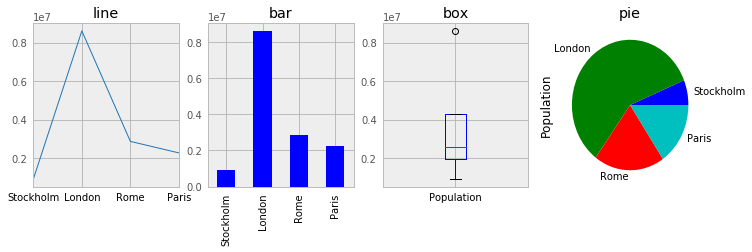

In [35]:
%matplotlib inline 
fig,axes = plt.subplots(1,4,figsize=(12,3))
s.plot(ax=axes[0],kind='line',title='line')
s.plot(ax=axes[1],kind='bar', title='bar')
s.plot(ax=axes[2],kind='box', title='box')
s.plot(ax=axes[3],kind='pie', title='pie')

## DataFrame

In [38]:
df=pd.DataFrame([[909976, "Sweden"],
                 [8615246, "United Kingdom"],
                 [2872086, "Italy"],
                 [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [40]:
df.index=["Stockholm", "London", "Rome", "Paris"]

In [41]:
df.columns = ["Population", "State"]

In [42]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [44]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United Kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]],
                   index=["Stockholm", "London", "Rome", "Paris"],
                   columns=["Population", "State"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [46]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
    "State": ["Sweden", "United Kingdom", "Italy", "France"]},
    index=["Stockholm", "London", "Rome", "Paris"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [47]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Rows of a DataFrame instance can
be accessed using the ix indexer attribute

In [48]:
df.ix['Stockholm']

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [49]:
df.ix[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [51]:
df.ix[["Paris", "Rome"], "State"]

Paris    France
Rome      Italy
Name: State, dtype: object

In [52]:
df.mean()

Population    3667653.25
dtype: float64

In [55]:
type(df.mean())

pandas.core.series.Series

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [57]:
df.dtypes

Population     int64
State         object
dtype: object

In [58]:
pd.read_csv?

In [60]:
!head -n 5 european_cities.csv

Rank,City,State,Population,Date of census
1,London, United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


In [68]:
df_pop = pd.read_csv("./ch12-datasets/european_cities.csv",
delimiter=",", encoding="utf-8", header=0)

In [69]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank              105 non-null int64
City              105 non-null object
State             105 non-null object
Population        105 non-null object
Date of census    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.9+ KB


In [70]:
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [71]:
df_pop["NumericPopulation"] = df_pop.Population.apply(
        lambda x: int(x.replace(",","")))

In [72]:
df_pop["State"].values[:3]

array([u' United Kingdom', u' Germany', u' Spain'], dtype=object)

removing extra white spaces in its elements using the string method strip

In [73]:
df_pop["State"] = df_pop["State"].apply(lambda x:x.strip())

In [74]:
df_pop.head()

,Rank,City,State,Population,Date of census,NumericPopulation
0,1,London,United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [75]:
df_pop["State"].values[:3]

array([u'United Kingdom', u'Germany', u'Spain'], dtype=object)

In [76]:
df_pop.dtypes

Rank                  int64
City                 object
State                object
Population           object
Date of census       object
NumericPopulation     int64
dtype: object

In [77]:
df_pop2 = df_pop.set_index("City")

In [78]:
df_pop2 = df_pop2.sort_index()

In [79]:
df_pop2.head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


The sort_index method also accepts a list of column names, in which case a hierarchical index is
created

In the following example we create a hierarchical index with State and
City as indices, and we use the sortlevel method to sort by the first index (State)

In [81]:
df_pop3 = df_pop.set_index(["State","City"]).sortlevel(0)

In [82]:
df_pop3.head(7)

Rank Population    Date of census  NumericPopulation
State    City                                                          
Austria  Vienna       7  1,794,770    1 January 2015            1794770
Belgium  Antwerp     59    510,610    1 January 2014             510610
         Brussels    16  1,175,831    1 January 2014            1175831
Bulgaria Plovdiv     84    341,041  31 December 2013             341041
         Sofia       14  1,291,895  14 December 2014            1291895
         Varna       85    335,819  31 December 2013             335819
Croatia  Zagreb      24    790,017     31 March 2011             790017

In [84]:
df_pop3.ix["Sweden"]

,Rank,Population,Date of census,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [85]:
df_pop3.ix[("Sweden","Gothenburg")]

Rank                            53
Population                 528,014
Date of census       31 March 2013
NumericPopulation           528014
Name: (Sweden, Gothenburg), dtype: object

In [90]:
df_pop.set_index("City").sort(["State", "NumericPopulation"], 
                              ascending=[False, True]).head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606
